# **Author: Shruti Shukla**

# **TASK 5 :- Exploratory Data Analysis - Sports**

# **GRIP @ The Sparks Foundation**

## Importing Libraries needed to perform task

In [4]:
# Importing all the libraries needed in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import io 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import files

# Reading the dataset

In [5]:
uploaded=files.upload()

Saving deliveries.csv to deliveries.csv
Saving matches.csv to matches.csv


In [7]:
sports=pd.read_csv(io.StringIO(uploaded['matches.csv'].decode('utf-8')))

In [8]:
sports.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Checking the dataset's information

In [9]:
sports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
sports.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [11]:
sports.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [12]:
sports.rename(columns={'win_by_runs':'Bat_1', 'win_by_wickets':'Ball_1'}, inplace=True)

In [14]:
print("City in which most matches have been won: ",sports['city'].value_counts().idxmax()) 
print("Team that has won most matches: ",sports['winner'].value_counts().idxmax()) 
print("Player who has been man of the match most times: ",sports['player_of_match'].value_counts().idxmax()) 
print("Most frequent Umpire 1: " ,sports['umpire1'].value_counts().idxmax())
print("Most frequent Umpire 2: " ,sports['umpire2'].value_counts().idxmax())

City in which most matches have been won:  Mumbai
Team that has won most matches:  Mumbai Indians
Player who has been man of the match most times:  CH Gayle
Most frequent Umpire 1:  HDPK Dharmasena
Most frequent Umpire 2:  C Shamshuddin


In [15]:
sports['city'].fillna(value='Mumbai', inplace=True)
sports['winner'].fillna(value='Mumbai Indians', inplace=True)
sports['player_of_match'].fillna(value='CH Gayle', inplace=True)
sports['umpire1'].fillna(value='HDPK Dharmasena', inplace=True)
sports['umpire2'].fillna(value='C Shamshuddin', inplace=True)
sports['umpire3'].fillna(value='NA', inplace=True)

In [16]:
sports.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
Bat_1              0
Ball_1             0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [17]:
sports.duplicated().sum()

0

Here we do not have any duplicated values.

# Data Visualization

# Finding Top Teams and Players

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


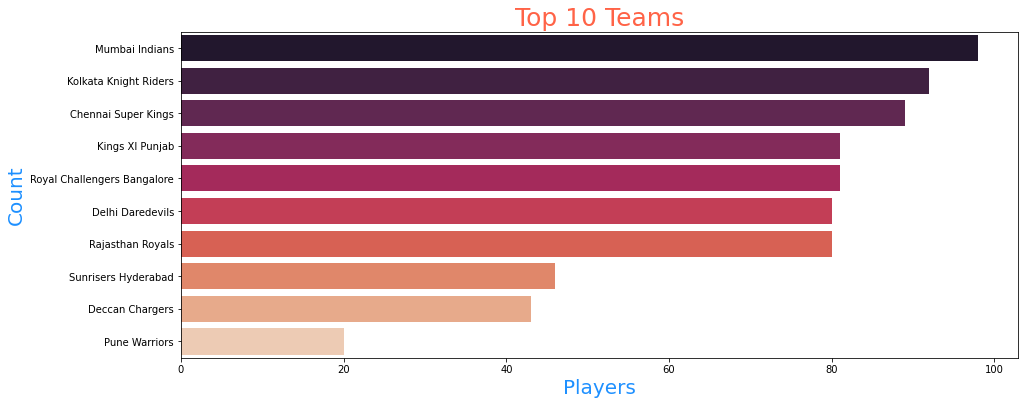

In [18]:
plt.figure(figsize=(15,6))
style1  = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}
sns.barplot(sports['toss_winner'].value_counts()[:10].values, sports['toss_winner'].value_counts()[:10].index,palette='rocket')
plt.title('Top 10 Teams', fontdict=style1 )
plt.xlabel('Players' , fontdict=style2 )
plt.ylabel('Count', fontdict=style2 )
plt.show()

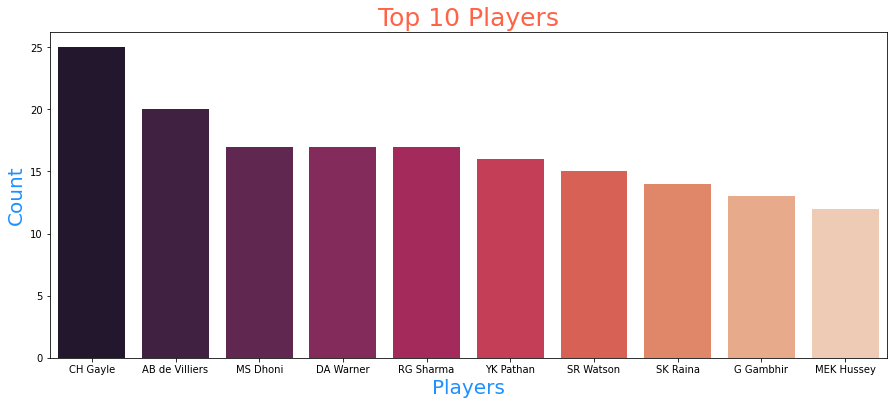

In [19]:
plt.subplots(figsize=(15,6))
style1  = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}
sns.barplot(sports['player_of_match'].value_counts()[:10].index, sports['player_of_match'].value_counts()[:10].values,palette='rocket')
plt.title('Top 10 Players', fontdict=style1 )
plt.xlabel('Players' , fontdict=style2 )
plt.ylabel('Count', fontdict=style2 )
plt.show()

Best Team is Mumbai Indians.
Best Player is CH Gayle.

# Finding the Factors Affecting the Victory

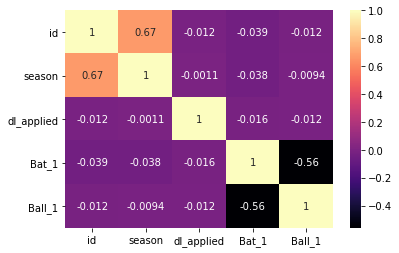

In [21]:
fac = sns.heatmap(sports.corr(), annot=True, cmap='magma')

In [22]:
sports = sports.drop(['dl_applied', 'season'], axis=1)

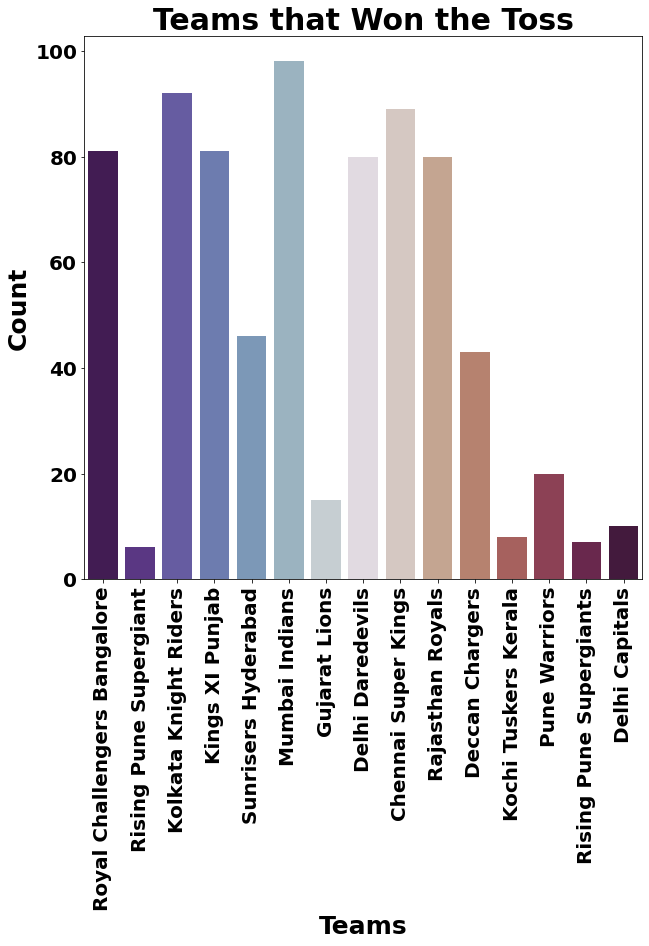

In [23]:
plt.figure(figsize=(10,10))

sns.countplot(sports['toss_winner'], data=sports, palette='twilight_shifted')

plt.xlabel('Teams', fontsize=25, fontweight='bold')
plt.ylabel('Count', fontsize=25, fontweight='bold')

plt.title('Teams that Won the Toss', fontweight="bold", size=30)

plt.xticks(rotation=90, fontweight="bold", size=20)
plt.yticks(fontweight="bold", size=20)

plt.show()

In [25]:
print('Team that won most matches by Batting First: ',sports.iloc[sports[sports['Bat_1'].ge(1)].Bat_1.idxmax()]['winner'])

Team that won most matches by Batting First:  Mumbai Indians


# Delivery Data 

In [26]:
sports1=pd.read_csv(io.StringIO(uploaded['deliveries.csv'].decode('utf-8')))

In [27]:
sports1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [28]:
sports1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [29]:
sports1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [31]:
sports1 = sports1.drop(['dismissal_kind','fielder'], axis=1)

# Merging the two Datasets into a new Dataset and Reading it (join on match-id)

In [32]:
delivery=pd.merge(sports1, sports, left_on='match_id', right_on='id')
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,id,city,date,team1,team2,toss_winner,toss_decision,result,winner,Bat_1,Ball_1,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,1,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,1,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,1,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,1,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,1,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA


In [33]:
print('Shape:', delivery.shape)
print('Size:', delivery.size)

Shape: (179078, 35)
Size: 6267730


In [34]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
id                       0
city                     0
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
winner                   0
Bat_1                    0
Ball_1                   0
player_of_match          0
venue                    0
umpire1                  0
umpire2                  0
umpire3                  0
dtype: int64

In [35]:
delivery['player_dismissed'].fillna(value='NA', inplace=True)
delivery.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
id                  0
city                0
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
winner              0
Bat_1               0
Ball_1              0
player_of_match     0
venue               0
umpire1             0
umpire2             0
umpire3             0
dtype: int64

In [36]:
delivery.duplicated().sum()

23

In [37]:
delivery.drop_duplicates()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,id,city,date,team1,team2,toss_winner,toss_decision,result,winner,Bat_1,Ball_1,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,1,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,1,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NA,1,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,1,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NA,1,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NA,11415,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NA,11415,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,11415,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NA,11415,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


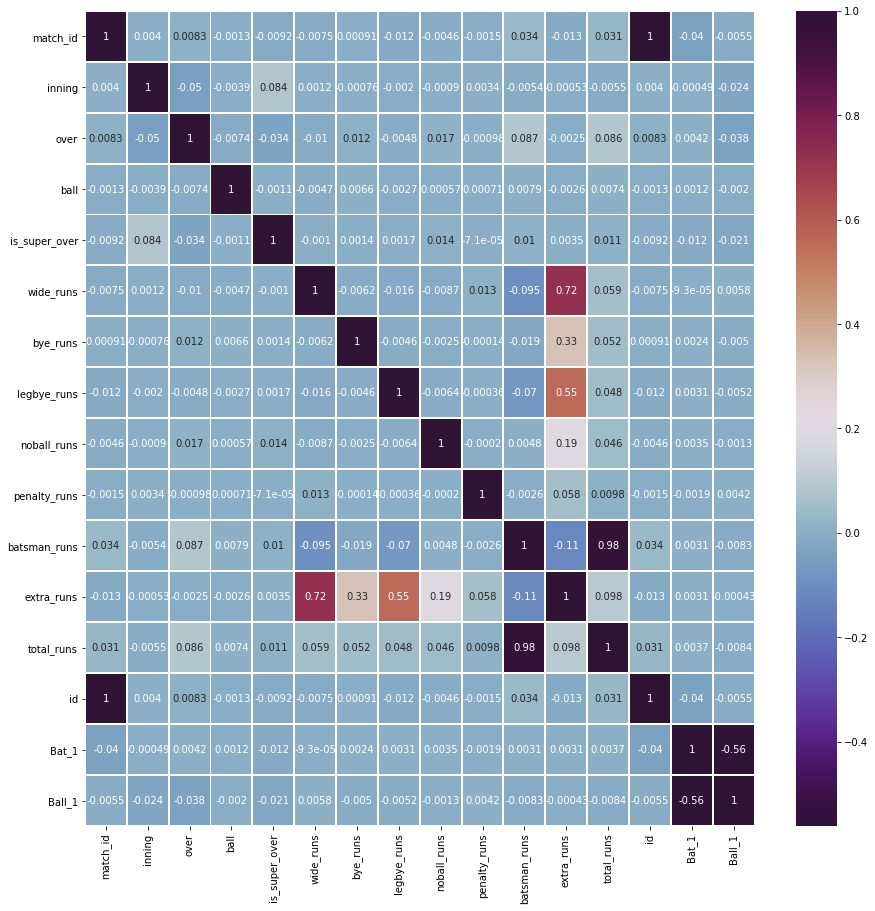

In [38]:
plt.figure(figsize=(15,15))
hm = sns.heatmap(delivery.corr(), annot=True, linewidth=1, cmap='twilight_shifted')

# Number of Matches Played in Each Stadium

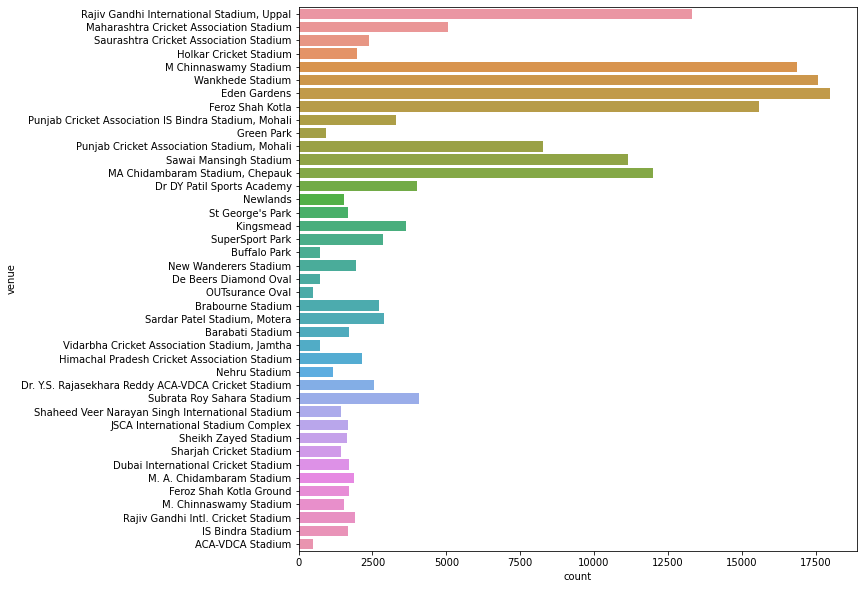

In [39]:
delivery.venue.value_counts()
plt.figure(figsize=(10,10))
sns.countplot(data=delivery, y='venue')
plt.show()

Most matches have been played in Eden Gardens followed by Wankhede Stadium.
Teams who win toss choose to field first

In [40]:
team_stats = pd.DataFrame({'Total Matches played': sports.team1.value_counts() + sports.team2.value_counts(), 'Total won': sports.winner.value_counts(), 'Toss won': sports.toss_winner.value_counts(), 
                          'Total lost': ((sports.team1.value_counts() + sports.team2.value_counts()) - sports.winner.value_counts())})
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace = True)
winloss = team_stats['Total won'] / team_stats['Total Matches played']
winloss = pd.DataFrame({'Winloss Ratio': team_stats['Total won'] / team_stats['Total Matches played']})
winloss= winloss.round(2)
team_stats = team_stats.join(winloss)
team_stats

,Teams,Total Matches played,Total won,Toss won,Total lost,Winloss Ratio
0,Chennai Super Kings,164,100,89,64,0.61
1,Deccan Chargers,75,29,43,46,0.39
2,Delhi Capitals,16,10,10,6,0.62
3,Delhi Daredevils,161,67,80,94,0.42
4,Gujarat Lions,30,13,15,17,0.43
5,Kings XI Punjab,176,82,81,94,0.47
6,Kochi Tuskers Kerala,14,6,8,8,0.43
7,Kolkata Knight Riders,178,92,92,86,0.52
8,Mumbai Indians,187,113,98,74,0.60
9,Pune Warriors,46,12,20,34,0.26


# Maximum Toss Won

Text(0.5, 1.0, 'Maximum Toss Won')

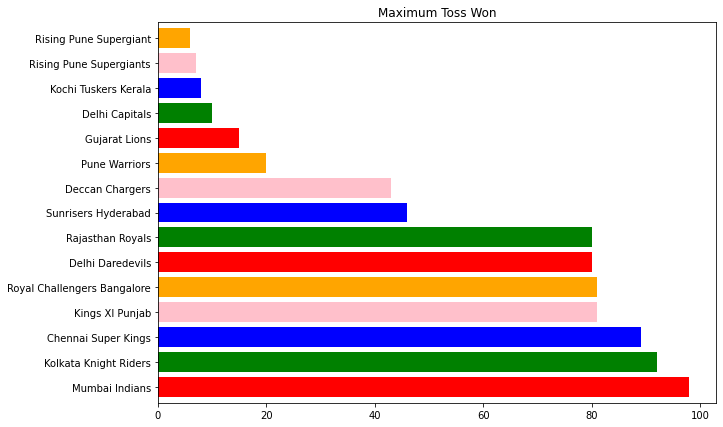

In [42]:
plt.subplots(figsize=(10,7))
ax=sports['toss_winner'].value_counts().plot.barh(width=0.8,color=['red', 'green','blue','pink','orange'])
plt.title("Maximum Toss Won")

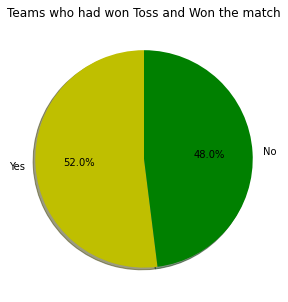

In [43]:
Tosswin_matchwin=sports[sports['toss_winner']==sports['winner']]
slices=[len(Tosswin_matchwin),(len(sports)-len(Tosswin_matchwin))]
labels=['Yes','No']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['y','g'])
plt.title("Teams who had won Toss and Won the match")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()


# Deciding Whether to Bat or Field After Winning the Toss

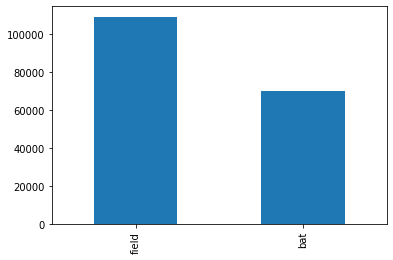

In [44]:
ts=delivery.toss_decision.value_counts().plot(kind='bar')
ts

# Relation between Winning toss and victory

Text(0.5, 1.0, 'Toss Wins vs Victory')

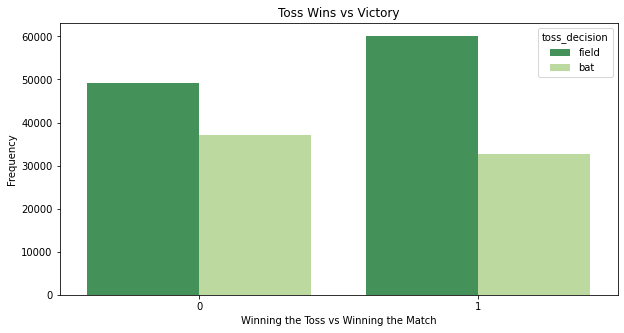

In [45]:
delivery['team_toss_win']=np.where((delivery.toss_winner==delivery.winner),1,0)
plt.figure(figsize=(10,5))
sns.countplot('team_toss_win', data=delivery, hue='toss_decision', palette='YlGn_r')
plt.xlabel("Winning the Toss vs Winning the Match")
plt.ylabel("Frequency")
plt.title("Toss Wins vs Victory")

Teams who choose to field after winning the toss have high chances of winning.

# Batsmen overview

In [46]:
batsmen = delivery.groupby("batsman").agg({'ball': 'count','batsman_runs': 'sum'})
batsmen.rename(columns={'ball':'balls', 'batsman_runs': 'runs'}, inplace=True)
batsmen = batsmen.sort_values(['balls','runs'], ascending=False)
batsmen['batting_strike_rate'] = batsmen['runs']/batsmen['balls'] * 100
batsmen['batting_strike_rate'] = batsmen['batting_strike_rate'].round(2)
batsmen.head(10)

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


In [47]:
#utility function used later
def trybuild(lookuplist, buildlist):
    alist = []
    for i in buildlist.index:
        try:
            #print(i)
            alist.append(lookuplist[i])
            #print(alist)
        except KeyError:
            #print('except')
            alist.append(0)
    return alist

In [48]:
TopBatsman = batsmen.sort_values(['balls','runs'], ascending=False)[:20]
TopBatsman

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


In [49]:
alist = []
for r in delivery.batsman_runs.unique():
    lookuplist = delivery[delivery.batsman_runs == r].groupby('batsman')['batsman'].count()
    batsmen[str(r) + 's'] = trybuild(lookuplist, batsmen)
    try:
        alist.append(lookuplist[r])
    except KeyError:
        alist.append(0)
TopBatsman = batsmen.sort_values(['balls','runs'], ascending=False)[:20]
TopBatsman.head(10)

,balls,runs,batting_strike_rate,0s,4s,1s,6s,3s,2s,5s,7s
batsman,,,,,,,,,,,
V Kohli,4211,5434,129.04,1493,482,1741,191,11,293,0,0
SK Raina,4044,5415,133.90,1381,495,1695,195,11,266,1,0
RG Sharma,3816,4914,128.77,1390,431,1589,194,5,205,1,1
S Dhawan,3776,4632,122.67,1455,526,1473,96,18,205,3,0
G Gambhir,3524,4223,119.84,1351,492,1358,59,15,249,0,0
RV Uthappa,3492,4446,127.32,1382,436,1295,156,13,206,4,0
DA Warner,3398,4741,139.52,1254,459,1213,181,18,271,2,0
MS Dhoni,3318,4477,134.93,1111,297,1383,207,14,304,0,2
AM Rahane,3215,3850,119.75,1198,405,1308,74,15,214,1,0


In [50]:
#Build a dictionary of Matches player by each batsman
played = {}
def BuildPlayedDict(x):
    #print(x.shape, x.shape[0], x.shape[1])
    for p in x.batsman.unique():
        if p in played:
            played[p] += 1
        else:
            played[p] = 1

delivery.groupby('match_id').apply(BuildPlayedDict)
import operator

In [51]:
TopBatsman['matches_played'] = [played[p] for p in TopBatsman.index]
TopBatsman['average']= TopBatsman['runs']/TopBatsman['matches_played']

TopBatsman['6s/match'] = TopBatsman['6s']/TopBatsman['matches_played']  
TopBatsman['6s/match'].median()

TopBatsman['4s/match'] = TopBatsman['4s']/TopBatsman['matches_played']  
TopBatsman['4s/match']
TopBatsman

,balls,runs,batting_strike_rate,0s,4s,1s,6s,3s,2s,5s,7s,matches_played,average,6s/match,4s/match
batsman,,,,,,,,,,,,,,,
V Kohli,4211,5434,129.04,1493,482,1741,191,11,293,0,0,169,32.153846,1.130178,2.852071
SK Raina,4044,5415,133.90,1381,495,1695,195,11,266,1,0,189,28.650794,1.031746,2.619048
RG Sharma,3816,4914,128.77,1390,431,1589,194,5,205,1,1,182,27.000000,1.065934,2.368132
S Dhawan,3776,4632,122.67,1455,526,1473,96,18,205,3,0,158,29.316456,0.607595,3.329114
G Gambhir,3524,4223,119.84,1351,492,1358,59,15,249,0,0,151,27.966887,0.390728,3.258278
RV Uthappa,3492,4446,127.32,1382,436,1295,156,13,206,4,0,170,26.152941,0.917647,2.564706
DA Warner,3398,4741,139.52,1254,459,1213,181,18,271,2,0,126,37.626984,1.436508,3.642857
MS Dhoni,3318,4477,134.93,1111,297,1383,207,14,304,0,2,170,26.335294,1.217647,1.747059
AM Rahane,3215,3850,119.75,1198,405,1308,74,15,214,1,0,132,29.166667,0.560606,3.068182


Total runs by each batsmen

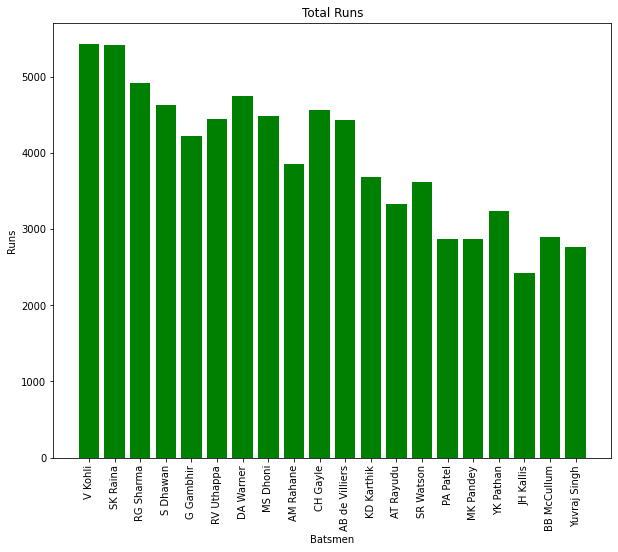

In [52]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBatsman)),TopBatsman['runs'],color='g')
plt.xticks(ticks=np.arange(len(TopBatsman)),labels=TopBatsman.index,rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('Runs')
plt.title('Total Runs')
plt.show()


Each batsmen strike rate

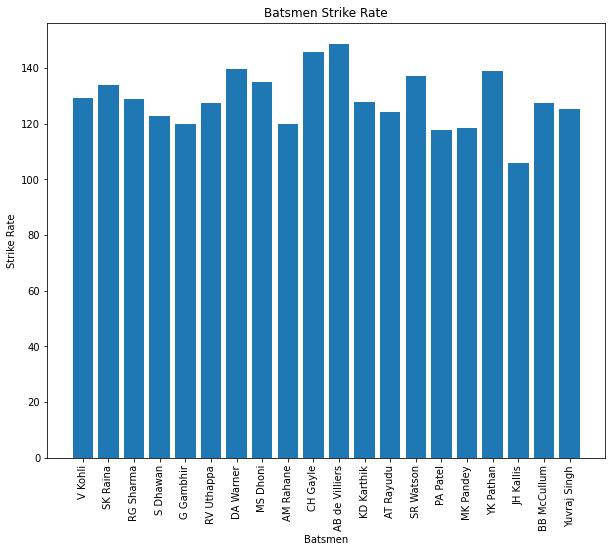

In [53]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBatsman)),TopBatsman['batting_strike_rate'])
plt.xticks(ticks=np.arange(len(TopBatsman)),labels=TopBatsman.index,rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('Strike Rate')
plt.title('Batsmen Strike Rate')
plt.show()

Top 5 Batsmen

Text(0.5, 1.0, 'Top 5 Batsmen')

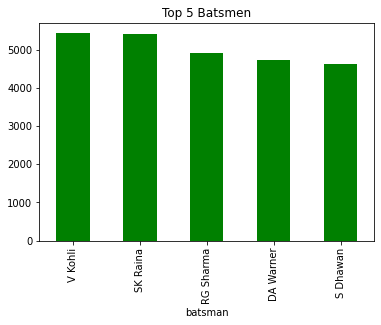

In [55]:
delivery.groupby('batsman')['batsman_runs'].agg("sum").sort_values(ascending= False).head().plot(kind='bar', color='Green')
plt.title("Top 5 Batsmen")

Virat Kohli and S.K Raina Scored the most runs, so probability is that in whichever team they are that team has high chances of winning by runs.
It is an important factor for a batsman in an T20 league to maintain a good strike rate. AB de Villiers and CH Gayle have almost equal strike rates.

Bowler information

In [56]:
bowler_wickets = delivery.groupby('bowler').aggregate({'ball': 'count', 'total_runs': 'sum', 'player_dismissed' : 'count'})
bowler_wickets.columns = ['runs','balls','wickets']
TopBowlers = bowler_wickets.sort_values(['wickets'], ascending=False)[:20]
TopBowlers

,runs,balls,wickets
bowler,,,
Harbhajan Singh,3451,4050,3451
A Mishra,3172,3850,3172
PP Chawla,3157,4153,3157
R Ashwin,3016,3391,3016
SL Malinga,2974,3511,2974
DJ Bravo,2711,3733,2711
B Kumar,2707,3264,2707
P Kumar,2637,3342,2637
UT Yadav,2605,3640,2605


In [57]:
TopBowlers['economy'] = TopBowlers['runs']/(TopBowlers['balls']/6)
TopBowlers = TopBowlers.sort_values(['economy'], ascending=True)[:20]
TopBowlers

,runs,balls,wickets,economy
bowler,,,,
UT Yadav,2605,3640,2605,4.293956
R Vinay Kumar,2186,3043,2186,4.310220
DJ Bravo,2711,3733,2711,4.357353
I Sharma,1999,2682,1999,4.472036
PP Chawla,3157,4153,3157,4.561040
RP Singh,1874,2417,1874,4.652048
SR Watson,2137,2751,2137,4.660851
A Nehra,1974,2537,1974,4.668506
IK Pathan,2113,2711,2113,4.676503


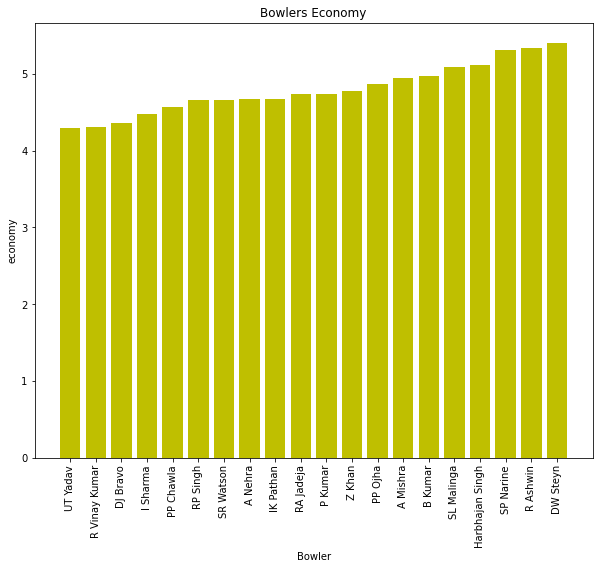

In [58]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBowlers)),TopBowlers['economy'],color='y')
plt.xticks(ticks=np.arange(len(TopBowlers)),labels=TopBowlers.index,rotation=90)
plt.xlabel('Bowler')
plt.ylabel('economy')
plt.title('Bowlers Economy')
plt.show()

Wickets taken by a bowler

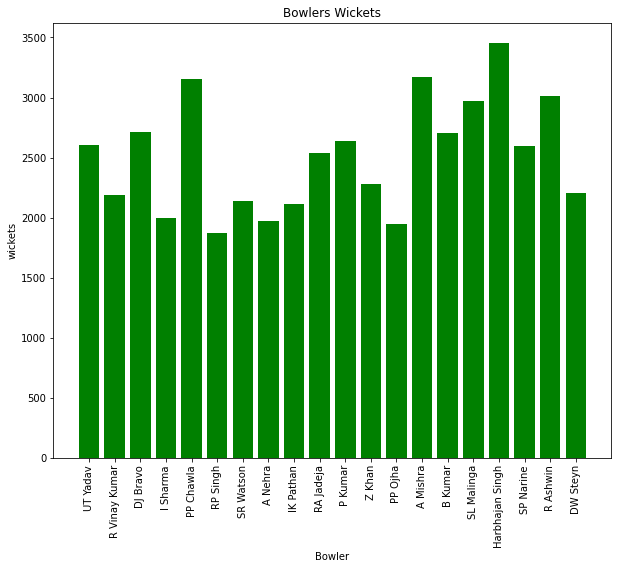

In [59]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBowlers)),TopBowlers['wickets'],color='GREEN')
plt.xticks(ticks=np.arange(len(TopBowlers)),labels=TopBowlers.index,rotation=90)
plt.xlabel('Bowler')
plt.ylabel('wickets')
plt.title('Bowlers Wickets')
plt.show()

Top 5 Bowlers

Text(0.5, 1.0, 'Top 5 Bowlers')

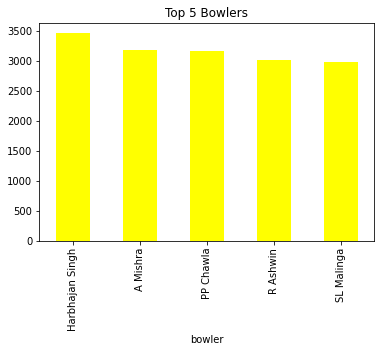

In [60]:
delivery.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(5).plot(kind='bar', color='yellow')
plt.title("Top 5 Bowlers")

Harbhajan Singh and A Mishra took the most wickets, so probability is that in whichever team they are that team has high chances of winning by wickets.

Summary:
1.)Best Team is Mumbai Indians.
2.)Best Player is CH Gayle.
3.)Winning Toss and Batting first are a factor that affect the victory.
4.)Most matches have been played in Eden Gardens followed by Wankhede Stadium.
5.)Teams who win toss choose to field first.
6.)Teams who choose to field after winning the toss have high chances of winning.
7.)Virat Kohli and S.K Raina Scored the most runs, so probability is that in whichever team they are that team has high chances of winning by runs and comapnies can also hire them to endorse products of batting.
8)Harbhajan Singh and A Mishra took the most wickets, so probability is that in whichever team they are that team has high chances of winning by wickets and comapnies can also hire them to endorse products of bowling.
T9.)op Players like, CH Gayle, AB de Villiers, MS Dhoni, and DA Warner can be hired by many companies to endorse their products as they have a huge fanbase.

Conclusion:  I have successfully implemented Exploratory Data Analysis - Sports and got successful output

Thank You